# Demo - SciKit Learn
* popular Python library providing efficient implementation of a large number of machine learning algorithms
* purposely designed to be clean and uniform across tools
* consistent data representation and common interface

# SciKit Learn Data Representation
<img style="height: 400px;" src="images/scikit-learn-data.png">

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

np.random.seed(5)

# load the iris dataset that ships with scikit learn
iris = datasets.load_iris()
dat = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                   columns= iris['feature_names'] + ['target'])
dat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [8]:
# Set up the feature matrix
X_iris = dat.drop('target', axis=1)
X_iris.shape,X_iris.head()

((150, 4),
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2)

In [3]:
# Set up the target vector
y_iris = iris['target']
y_iris.shape

(150,)

# scikit-learn Objects
* "All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: an estimator interface for building and fitting models, a predictor interface for making predictions and a transformer interface for converting data."
<br>__*API design for machine learning software:
experiences from the scikit-learn project*__ (https://arxiv.org/pdf/1309.0238.pdf)

# Estimator API
* Driven by a set of principles documented in the above paper:
  * Consistency
  * Allow Inspection
  * Limited object hierarchies
  * Composition
  * Sensible defaults

# General Workflow
* Choose a model
* Choose model hyperparameters
* Arrange data into a features matrix and target vector
* Fit the model to the data with the __`fit()`__ method
* Apply the model to test data (__`predict()`__ or __`transform()`__)

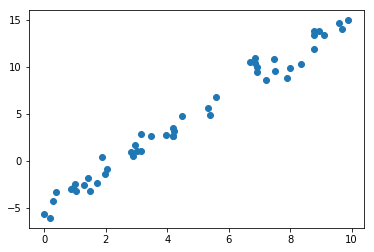

In [4]:
# Linear Regression Example from Python Data Science Handbook
# First, generate some sample data
# We'll add some random noise so the points are scattered
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)

# generate some randomness in the y axis
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


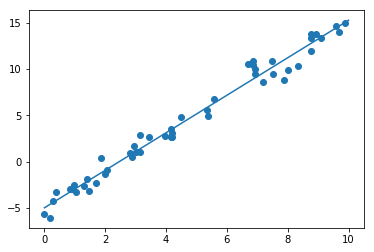

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# the data needs to be of the form [n_samples, n_features]
# so we add a new axis to generate a 2-D array from x
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
# same for xfit...
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)

tree_clf.fit(X_iris, y_iris)
tree_clf.predict([[5, 1.5, 2, 2.0]])

array([2])

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)

kmeans.fit(X)
kmeans.labels_

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0], dtype=int32)